
# **GRANGER  CASULITY**



In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle



In [ ]:
data =pd.read_excel("gdp_quarterly.xlsx")
data.head(2)

,Quarter,Retail Sales,Consumption Good Imports,Retail Loans Average,IP of Consumer Goods,Special Consumption Tax,State Expenditures,Tourists,Retail NPLs,Passenger Car,White Goods,House sales,IPI,Capex,Commercial \nLoan,KKO,Elektrik,Inv Good Imp,export Unit Value,export US$'000s,US$/TRY,import Unit Value,import US$'000s,Exports,Imports,Stock,Real GDP
0,1q13,77.688910,21178.559114,1245.287641,80.431667,27.624590,46709.381558,1.404783e+06,0.005982,38144.666667,500539.000000,40578.666667,80.38852,6294.820039,2527.344257,74.233333,19662.324667,23657.083827,116.611625,50946000,1.780724,125.922123,64247000,112866.973028,162092.223216,89.755682,2.986855e+08
1,2q13,89.608857,23194.488418,1316.938851,94.825000,33.195726,48074.898696,3.445058e+06,0.007900,59224.000000,566228.333333,43542.333333,90.05867,11874.420009,2655.567796,76.366667,19144.566667,27591.350981,114.396016,58076000,1.838624,123.914817,72055000,118433.477871,186207.039613,80.732093,3.386151e+08


In [ ]:
#difference operation for sttionarity
rawData = data.copy(deep=True)

In [ ]:
data['Real GDP '] = data['Real GDP '] - data['Real GDP '].shift(1)
#data['freq'] = data['freq'] - data['freq'].shift(1)

In [ ]:
data.Quarter = pd.to_datetime(data.Quarter)
data.head(2)

,Quarter,Retail Sales,Consumption Good Imports,Retail Loans Average,IP of Consumer Goods,Special Consumption Tax,State Expenditures,Tourists,Retail NPLs,Passenger Car,White Goods,House sales,IPI,Capex,Commercial \nLoan,KKO,Elektrik,Inv Good Imp,export Unit Value,export US$'000s,US$/TRY,import Unit Value,import US$'000s,Exports,Imports,Stock,Real GDP
0,2013-01-01,77.688910,21178.559114,1245.287641,80.431667,27.624590,46709.381558,1.404783e+06,0.005982,38144.666667,500539.000000,40578.666667,80.38852,6294.820039,2527.344257,74.233333,19662.324667,23657.083827,116.611625,50946000,1.780724,125.922123,64247000,112866.973028,162092.223216,89.755682,NaN
1,2013-04-01,89.608857,23194.488418,1316.938851,94.825000,33.195726,48074.898696,3.445058e+06,0.007900,59224.000000,566228.333333,43542.333333,90.05867,11874.420009,2655.567796,76.366667,19144.566667,27591.350981,114.396016,58076000,1.838624,123.914817,72055000,118433.477871,186207.039613,80.732093,3.992960e+07


In [ ]:
columns =[ 'Retail Sales', 'Consumption Good Imports',
       'Retail Loans Average', 'IP of Consumer Goods',
       'Special Consumption Tax', 'State Expenditures', 'Tourists',
       'Retail NPLs', 'Passenger Car', 'White Goods', 'House sales', 'IPI',
       'Capex', 'Commercial \nLoan', 'KKO ', 'Elektrik', 'Inv Good Imp',
       'export Unit Value', "export US$'000s", 'US$/TRY', ' import Unit Value',
       "import US$'000s", 'Exports', 'Imports', 'Stock', 'Real GDP ']

In [ ]:
for i in data[columns]:
    data[i] = data[i] - data[i].shift(1)

data = data.dropna()

In [ ]:
data.head(2)

,Quarter,Retail Sales,Consumption Good Imports,Retail Loans Average,IP of Consumer Goods,Special Consumption Tax,State Expenditures,Tourists,Retail NPLs,Passenger Car,White Goods,House sales,IPI,Capex,Commercial \nLoan,KKO,Elektrik,Inv Good Imp,export Unit Value,export US$'000s,US$/TRY,import Unit Value,import US$'000s,Exports,Imports,Stock,Real GDP
2,2013-07-01,4.752724,-865.587869,79.149037,-1.085000,0.577434,823.013011,1.156823e+06,-0.007056,-5808.0,112327.0,1397.333333,-0.862007,3560.168340,133.414341,1.900000,2008.256333,-3664.809762,-1.008686,1133000.0,0.129825,-2.594722,-4071000.0,-2344.079532,-9225.297135,2.860000,-4.335988e+06
3,2013-10-01,4.166484,-871.836427,25.877521,10.221667,-0.363250,5864.051275,-2.416903e+06,0.009364,17351.0,-146950.0,2376.000000,7.152264,15641.755628,71.920640,-0.233333,-1061.220667,544.081174,0.327343,-1173000.0,0.058580,2.508849,2512000.0,6621.109925,559.015123,5.086667,-4.191742e+07


In [ ]:
# split data into train and test. We will need this later for VAR analysis
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [ ]:
data

,Quarter,Retail Sales,Consumption Good Imports,Retail Loans Average,IP of Consumer Goods,Special Consumption Tax,State Expenditures,Tourists,Retail NPLs,Passenger Car,White Goods,House sales,IPI,Capex,Commercial \nLoan,KKO,Elektrik,Inv Good Imp,export Unit Value,export US$'000s,US$/TRY,import Unit Value,import US$'000s,Exports,Imports,Stock,Real GDP
2,2013-07-01,4.752724,-865.587869,79.149037,-1.085000,0.577434,823.013011,1.156823e+06,-0.007056,-5808.000000,112327.000000,1397.333333,-0.862007,3560.168340,133.414341,1.900000,2008.256333,-3664.809762,-1.008686,1133000.0,0.129825,-2.594722,-4071000.0,-2344.079532,-9225.297135,2.860000,-4.335988e+06
3,2013-10-01,4.166484,-871.836427,25.877521,10.221667,-0.363250,5864.051275,-2.416903e+06,0.009364,17351.000000,-146950.000000,2376.000000,7.152264,15641.755628,71.920640,-0.233333,-1061.220667,544.081174,0.327343,-1173000.0,0.058580,2.508849,2512000.0,6621.109925,559.015123,5.086667,-4.191742e+07
4,2014-01-01,-15.634655,-3489.382667,-9.986408,-16.395000,-6.989033,-4066.808308,-7.346517e+05,-0.007089,-40984.666667,-99846.333333,-7245.000000,-8.082877,-23055.103062,44.993560,-3.400000,421.831000,-4840.103884,1.071623,-3023000.0,0.189234,-1.055500,-6695000.0,-176.524057,-13951.491598,0.012430,-3.726738e+07
5,2014-04-01,8.428286,1123.622834,-31.596100,7.050000,4.107267,-260.635559,2.178754e+06,0.006164,15693.000000,130099.666667,473.000000,6.021799,3360.950372,47.483147,0.500000,-380.000000,3215.865341,-0.136142,4624000.0,-0.105133,0.164854,4769000.0,230.755519,11188.174490,-1.519575,6.735543e+07
6,2014-07-01,6.475761,458.007348,15.586342,-0.745000,3.207600,-126.724592,1.321013e+06,0.000192,1523.000000,121622.333333,6536.333333,-0.191880,6555.800019,103.104880,-0.166667,2554.733333,-2237.961267,-0.834672,3433000.0,0.052846,-1.841008,-2038000.0,-4120.311551,-2695.259821,2.346868,1.519363e+07
7,2014-10-01,4.611288,184.220831,9.202176,10.476667,0.797244,6184.596863,-2.700294e+06,0.001672,26522.666667,-125100.666667,5743.666667,6.229766,10266.872898,114.454305,0.366667,-2035.633333,1957.539148,-4.138514,-5207000.0,0.097987,-5.598762,2311000.0,7706.885518,12372.112292,1.753159,-3.780891e+07
8,2015-01-01,-14.530339,-2666.329305,12.257163,-16.331667,-5.087468,-4125.931126,-3.778853e+05,-0.011963,-31190.666667,-94621.666667,-9450.333333,-10.130233,-18641.130072,97.170093,-1.166667,596.350000,-3833.844045,-5.960617,-7527000.0,0.200429,-10.563365,-11638000.0,-1097.741677,-11756.097417,-2.707992,-5.353035e+07
9,2015-04-01,10.562484,476.256992,3.583932,10.818333,4.181658,894.455234,1.941049e+06,0.013539,24621.333333,168391.000000,7560.333333,10.670259,3021.614971,67.863287,3.133333,-473.333333,3459.336543,-2.077870,2798000.0,0.205103,-2.565373,2621000.0,-79.654624,9043.946712,-2.989262,8.962340e+07
10,2015-07-01,5.951478,-1465.474385,25.905354,2.513333,3.249325,607.579568,1.685480e+06,0.001655,-9265.333333,84015.333333,-4209.000000,-2.962903,3822.678953,75.532530,0.500000,2474.696667,-4124.630703,-2.289150,1939000.0,0.180638,-4.114130,-4598000.0,-6625.367712,-7671.545051,2.167159,-1.101305e+06
11,2015-10-01,4.895963,98.775051,-33.057747,10.455000,-1.522098,4539.863027,-2.977073e+06,-0.000888,17210.666667,-164888.000000,11799.333333,13.133021,16965.426451,-17.688749,0.233333,-1263.813333,682.029806,-4.053497,-3263000.0,0.056597,-3.816268,1887000.0,16151.163570,9920.052141,-1.992550,-2.767464e+07


In [ ]:
train.drop("Quarter",inplace=True,axis=1)
test.drop("Quarter",inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
## ADF Null hypothesis: there is a unit root, meaning series is non-stationary
from statsmodels.tsa.stattools import adfuller

for i in data[columns]:

  X1 = np.array(data[i])
  X1 = X1[~np.isnan(X1)]

  result = adfuller(X1)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    

ADF Statistic: -12.132915
p-value: 0.000000
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
ADF Statistic: -4.689829
p-value: 0.000088
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
ADF Statistic: -3.267095
p-value: 0.016415
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
ADF Statistic: -9.356038
p-value: 0.000000
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
ADF Statistic: -2.554791
p-value: 0.102706
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
ADF Statistic: -8.005460
p-value: 0.000000
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
ADF Statistic: -2.979610
p-value: 0.036843
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
ADF Statistic: -8.520107
p-value: 0.000000
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
ADF Statistic: -1.869031
p-value: 0.346767
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
ADF Statistic: -2.114288
p-value: 0.238808
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
ADF Statistic: -8.269861
p-va

Step 2: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc.

Result: We saw above that for our case m = 1

Step 3: Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

Step 4: Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.

In [ ]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss

for i in data[columns]:

  X1 = np.array(data[i])
  X1 = X1[~np.isnan(X1)]

  def kpss_test(series, **kw):    
      statistic, p_value, n_lags, critical_values = kpss(series, **kw)
      # Format Output
      print(f'KPSS Statistic: {statistic}')
      print(f'p-value: {p_value}')
      print(f'num lags: {n_lags}')
      print('Critial Values:')
      for key, value in critical_values.items():
          print(f'   {key} : {value}')
      print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

  kpss_test(X1)



KPSS Statistic: 0.16933632841272966
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.21295644594795407
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.1884874304353113
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.22351954029393448
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.1772742632159102
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.17108659737157547
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-valu

In [ ]:
rawData

,Quarter,Retail Sales,Consumption Good Imports,Retail Loans Average,IP of Consumer Goods,Special Consumption Tax,State Expenditures,Tourists,Retail NPLs,Passenger Car,White Goods,House sales,IPI,Capex,Commercial \nLoan,KKO,Elektrik,Inv Good Imp,export Unit Value,export US$'000s,US$/TRY,import Unit Value,import US$'000s,Exports,Imports,Stock,Real GDP
0,1q13,77.688910,21178.559114,1245.287641,80.431667,27.624590,46709.381558,1.404783e+06,0.005982,38144.666667,500539.000000,40578.666667,80.388520,6294.820039,2527.344257,74.233333,19662.324667,23657.083827,116.611625,50946000,1.780724,125.922123,64247000,112866.973028,162092.223216,89.755682,2.986855e+08
1,2q13,89.608857,23194.488418,1316.938851,94.825000,33.195726,48074.898696,3.445058e+06,0.007900,59224.000000,566228.333333,43542.333333,90.058670,11874.420009,2655.567796,76.366667,19144.566667,27591.350981,114.396016,58076000,1.838624,123.914817,72055000,118433.477871,186207.039613,80.732093,3.386151e+08
2,3q13,94.361581,22328.900548,1396.087888,93.740000,33.773160,48897.911706,4.601881e+06,0.000844,53416.000000,678555.333333,44939.666667,89.196663,15434.588350,2788.982137,78.266667,21152.823000,23926.541219,113.387330,59209000,1.968449,121.320095,67984000,116089.398339,176981.742478,83.592093,3.742087e+08
3,4q13,98.528066,21457.064121,1421.965409,103.961667,33.409910,54761.962982,2.184978e+06,0.010208,70767.000000,531605.333333,47315.666667,96.348927,31076.343978,2860.902777,78.033333,20091.602333,24470.622393,113.714673,58036000,2.027030,123.828943,70496000,122710.508263,177540.757602,88.678759,3.678849e+08
4,1q14,82.893411,17967.681454,1411.979001,87.566667,26.420877,50695.154673,1.450326e+06,0.003119,29782.333333,431759.000000,40070.666667,88.266050,8021.240916,2905.896337,74.633333,20513.433333,19630.518509,114.786297,55013000,2.216263,122.773443,63801000,122533.984206,163589.266004,88.691189,3.242937e+08
5,2q14,91.321698,19091.304288,1380.382901,94.616667,30.528144,50434.519114,3.629081e+06,0.009282,45475.333333,561858.666667,40543.666667,94.287849,11382.191289,2953.379484,75.133333,20133.433333,22846.383850,114.650155,59637000,2.111131,122.938297,68570000,122764.739726,174777.440494,87.171614,3.480580e+08
6,3q14,97.797458,19549.311636,1395.969244,93.871667,33.735744,50307.794522,4.950094e+06,0.009475,46998.333333,683481.000000,47080.000000,94.095969,17937.991307,3056.484364,74.966667,22688.166667,20608.422583,113.815483,63070000,2.163976,121.097289,66532000,118644.428175,172082.180672,89.518482,3.870158e+08
7,4q14,102.408746,19733.532467,1405.171419,104.348333,34.532988,56492.391385,2.249799e+06,0.011147,73521.000000,558380.333333,52823.666667,100.325735,28204.864205,3170.938669,75.333333,20652.533333,22565.961731,109.676969,57863000,2.261963,115.498527,68843000,126351.313692,184454.292965,91.271641,3.881648e+08
8,1q15,87.878408,17067.203163,1417.428582,88.016667,29.445519,52366.460259,1.871914e+06,-0.000817,42330.333333,463758.666667,43373.333333,90.195502,9563.734133,3268.108762,74.166667,21248.883333,18732.117685,103.716352,50336000,2.462392,104.935162,57205000,125253.572016,172698.195548,88.563650,3.357834e+08
9,2q15,98.440891,17543.460155,1421.012514,98.835000,33.627178,53260.915493,3.812963e+06,0.012722,66951.666667,632149.666667,50933.666667,100.865761,12585.349104,3335.972049,77.300000,20775.550000,22191.454228,101.638482,53134000,2.667495,102.369789,59826000,125173.917392,181742.142259,85.574387,3.730254e+08


In [ ]:
rawData = rawData[columns]
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

Lag Order = 1
Lag Order = 2
AIC :  -1109.5339092080703
BIC :  -1045.1722428103885
FPE :  0.0
HQIC:  -1088.944059135622 

Lag Order = 3
AIC :  -1160.968555263704
BIC :  -1064.1262919950068
FPE :  0.0
HQIC:  -1130.638766593796 

Lag Order = 4
AIC :  -1114.5797590238249
BIC :  -984.6898192817425
FPE :  0.0
HQIC:  -1074.871109519014 

Lag Order = 5
AIC :  -1081.454398049072
BIC :  -917.986977100526
FPE :  0.0
HQIC:  -1032.846964266401 

Lag Order = 6
AIC :  -1010.0087417472778
BIC :  -812.487585277905
FPE :  0.0
HQIC:  -953.1297955331083 

Lag Order = 7
Lag Order = 8
Lag Order = 9
Lag Order = 10
Lag Order = 11
Lag Order = 12


In [ ]:
model = VAR(train)
model_fitted = model.fit(3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

Quarter : 1.79
Retail Sales : 1.52
Consumption Good Imports : 1.72
Retail Loans Average : 1.4
IP of Consumer Goods : 1.66
Special Consumption Tax : 1.74
State Expenditures : 1.64
Tourists : 1.84
Retail NPLs : 1.87
Passenger Car : 2.68
White Goods : 1.63
House sales : 1.62
IPI : 1.88
Capex : 2.14
Commercial 
Loan : 1.81
KKO  : 1.95
Elektrik : 1.69
Inv Good Imp : 1.74
export Unit Value : 1.36
export US$'000s : 1.54
US$/TRY : 1.68
 import Unit Value : 0.94
import US$'000s : 2.77
Exports : 1.55
Imports : 1.67
Stock : 1.97


In [ ]:
# I could not perform Johansen's test. Instead I check for co-integration using t-statistics

import math
import statsmodels.tsa.stattools as ts 
for i in data[columns]:
  for y in data[columns]:
    result=ts.coint(data[i], data[y])
    if result[1] < 0.05 and i != y:
      print("P-value is equal to",result[1],"Accoring to T statistics,",i,"and",y ,"is cointegrated")
        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.005252335714179827 Accoring to T statistics, Retail Sales and IP of Consumer Goods is cointegrated
P-value is equal to 0.046340285885789124 Accoring to T statistics, Retail Sales and Special Consumption Tax is cointegrated
P-value is equal to 0.021769249009664943 Accoring to T statistics, Retail Sales and State Expenditures is cointegrated
P-value is equal to 2.359199096337905e-11 Accoring to T statistics, Retail Sales and Passenger Car is cointegrated
P-value is equal to 6.031045232833887e-22 Accoring to T statistics, Retail Sales and White Goods is cointegrated
P-value is equal to 3.631679790878997e-06 Accoring to T statistics, Retail Sales and House sales is cointegrated
P-value is equal to 2.0487187812653765e-13 Accoring to T statistics, Retail Sales and IPI is cointegrated
P-value is equal to 5.1366162594925835e-25 Accoring to T statistics, Retail Sales and Commercial 
Loan is cointegrated
P-value is equal to 4.780693431314657e-11 Accoring to T statistics, Re

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 1.2549700414478031e-07 Accoring to T statistics, Consumption Good Imports and export US$'000s is cointegrated
P-value is equal to 3.381743006431088e-07 Accoring to T statistics, Consumption Good Imports and  import Unit Value is cointegrated
P-value is equal to 7.335966475051381e-06 Accoring to T statistics, Consumption Good Imports and import US$'000s is cointegrated
P-value is equal to 5.008001991568717e-06 Accoring to T statistics, Consumption Good Imports and Exports is cointegrated
P-value is equal to 3.761781673641844e-06 Accoring to T statistics, Consumption Good Imports and Imports is cointegrated
P-value is equal to 1.879311242841699e-05 Accoring to T statistics, Consumption Good Imports and Stock is cointegrated
P-value is equal to 8.490639630924257e-06 Accoring to T statistics, Consumption Good Imports and Real GDP  is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.01638675085119714 Accoring to T statistics, Retail Loans Average and Exports is cointegrated
P-value is equal to 0.002220023356284252 Accoring to T statistics, IP of Consumer Goods and Retail Sales is cointegrated
P-value is equal to 2.528952395887833e-05 Accoring to T statistics, IP of Consumer Goods and Consumption Good Imports is cointegrated
P-value is equal to 0.021010706305692215 Accoring to T statistics, IP of Consumer Goods and Retail Loans Average is cointegrated
P-value is equal to 0.009915600072430695 Accoring to T statistics, IP of Consumer Goods and State Expenditures is cointegrated
P-value is equal to 2.956225596800582e-13 Accoring to T statistics, IP of Consumer Goods and Tourists is cointegrated
P-value is equal to 0.00014827091863642446 Accoring to T statistics, IP of Consumer Goods and Passenger Car is cointegrated
P-value is equal to 5.054227930885741e-10 Accoring to T statistics, IP of Consumer Goods and White Goods is cointegrated
P-value is 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 1.690310608657324e-13 Accoring to T statistics, IP of Consumer Goods and Elektrik is cointegrated
P-value is equal to 1.2174013056170923e-05 Accoring to T statistics, IP of Consumer Goods and Inv Good Imp is cointegrated
P-value is equal to 1.3803046440145741e-12 Accoring to T statistics, IP of Consumer Goods and export Unit Value is cointegrated
P-value is equal to 6.2945264471563394e-15 Accoring to T statistics, IP of Consumer Goods and export US$'000s is cointegrated
P-value is equal to 2.6154863937122063e-13 Accoring to T statistics, IP of Consumer Goods and US$/TRY is cointegrated
P-value is equal to 0.025353226229578522 Accoring to T statistics, IP of Consumer Goods and Exports is cointegrated
P-value is equal to 0.026125488519357424 Accoring to T statistics, IP of Consumer Goods and Imports is cointegrated
P-value is equal to 7.345019428974633e-15 Accoring to T statistics, IP of Consumer Goods and Real GDP  is cointegrated
P-value is equal to 0.02256990322151

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 3.3871834836815334e-05 Accoring to T statistics, Special Consumption Tax and House sales is cointegrated
P-value is equal to 0.0005675741154846618 Accoring to T statistics, Special Consumption Tax and export US$'000s is cointegrated
P-value is equal to 0.038992338538727245 Accoring to T statistics, Special Consumption Tax and import US$'000s is cointegrated
P-value is equal to 3.506243208102408e-22 Accoring to T statistics, Special Consumption Tax and Imports is cointegrated
P-value is equal to 2.139800815177286e-09 Accoring to T statistics, Special Consumption Tax and Stock is cointegrated
P-value is equal to 3.86699912823631e-06 Accoring to T statistics, Special Consumption Tax and Real GDP  is cointegrated
P-value is equal to 0.021039022521349492 Accoring to T statistics, State Expenditures and Retail Sales is cointegrated
P-value is equal to 0.02202485171961585 Accoring to T statistics, State Expenditures and Consumption Good Imports is cointegrated
P-value is e

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


 4.420036715266455e-10 Accoring to T statistics, State Expenditures and  import Unit Value is cointegrated
P-value is equal to 0.023477494784596344 Accoring to T statistics, State Expenditures and import US$'000s is cointegrated
P-value is equal to 5.75943915393916e-09 Accoring to T statistics, State Expenditures and Exports is cointegrated
P-value is equal to 0.00940215587289951 Accoring to T statistics, State Expenditures and Imports is cointegrated
P-value is equal to 9.84502226613566e-14 Accoring to T statistics, State Expenditures and Stock is cointegrated
P-value is equal to 4.513319681916439e-12 Accoring to T statistics, State Expenditures and Real GDP  is cointegrated
P-value is equal to 4.2694898570488336e-16 Accoring to T statistics, Tourists and State Expenditures is cointegrated
P-value is equal to 8.963896046975418e-07 Accoring to T statistics, Tourists and White Goods is cointegrated
P-value is equal to 0.032266225009320124 Accoring to T statistics, Tourists and House sal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.02852637784437029 Accoring to T statistics, Retail NPLs and Retail Sales is cointegrated
P-value is equal to 2.5806546740846e-09 Accoring to T statistics, Retail NPLs and Consumption Good Imports is cointegrated
P-value is equal to 2.431503062973402e-15 Accoring to T statistics, Retail NPLs and Retail Loans Average is cointegrated
P-value is equal to 0.03916271854409743 Accoring to T statistics, Retail NPLs and IP of Consumer Goods is cointegrated
P-value is equal to 1.0585721665919794e-10 Accoring to T statistics, Retail NPLs and Special Consumption Tax is cointegrated
P-value is equal to 0.04550323966606166 Accoring to T statistics, Retail NPLs and Passenger Car is cointegrated
P-value is equal to 9.125398847398944e-13 Accoring to T statistics, Retail NPLs and House sales is cointegrated
P-value is equal to 0.019891616727495953 Accoring to T statistics, Retail NPLs and IPI is cointegrated
P-value is equal to 0.00877464740007593 Accoring to T statistics, Retail N

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 6.481079881365114e-13 Accoring to T statistics, Retail NPLs and US$/TRY is cointegrated
P-value is equal to 1.0392112372658646e-09 Accoring to T statistics, Retail NPLs and  import Unit Value is cointegrated
P-value is equal to 0.023445484527618264 Accoring to T statistics, Retail NPLs and import US$'000s is cointegrated
P-value is equal to 0.01035778764609394 Accoring to T statistics, Retail NPLs and Imports is cointegrated
P-value is equal to 0.02393362638573764 Accoring to T statistics, Retail NPLs and Stock is cointegrated
P-value is equal to 3.7359911337281417e-13 Accoring to T statistics, Retail NPLs and Real GDP  is cointegrated
P-value is equal to 8.275121010317684e-15 Accoring to T statistics, Passenger Car and Retail Loans Average is cointegrated
P-value is equal to 7.203732970770482e-12 Accoring to T statistics, Passenger Car and IP of Consumer Goods is cointegrated
P-value is equal to 6.83630715268759e-28 Accoring to T statistics, Passenger Car and Speci

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


Passenger Car and House sales is cointegrated
P-value is equal to 5.375416280004122e-05 Accoring to T statistics, Passenger Car and IPI is cointegrated
P-value is equal to 9.931395935687713e-11 Accoring to T statistics, Passenger Car and Capex is cointegrated
P-value is equal to 2.969495731016647e-09 Accoring to T statistics, Passenger Car and Inv Good Imp is cointegrated
P-value is equal to 0.005237258666396964 Accoring to T statistics, Passenger Car and export US$'000s is cointegrated
P-value is equal to 0.012188814084274772 Accoring to T statistics, Passenger Car and Imports is cointegrated
P-value is equal to 9.026081505597607e-19 Accoring to T statistics, White Goods and IP of Consumer Goods is cointegrated
P-value is equal to 0.0472486032271196 Accoring to T statistics, White Goods and Special Consumption Tax is cointegrated
P-value is equal to 4.451142453058255e-18 Accoring to T statistics, White Goods and State Expenditures is cointegrated
P-value is equal to 6.626880357779457e

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 4.570557976906836e-13 Accoring to T statistics, White Goods and Exports is cointegrated
P-value is equal to 0.006202252654086115 Accoring to T statistics, White Goods and Stock is cointegrated
P-value is equal to 4.65691079116775e-06 Accoring to T statistics, House sales and State Expenditures is cointegrated
P-value is equal to 5.964866877232418e-12 Accoring to T statistics, House sales and Tourists is cointegrated
P-value is equal to 2.129794224414114e-10 Accoring to T statistics, House sales and Retail NPLs is cointegrated
P-value is equal to 3.576933239565737e-09 Accoring to T statistics, House sales and Passenger Car is cointegrated
P-value is equal to 4.5404476330854175e-11 Accoring to T statistics, House sales and White Goods is cointegrated
P-value is equal to 1.4062280872621581e-11 Accoring to T statistics, House sales and Commercial 
Loan is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 1.7418641710367192e-12 Accoring to T statistics, House sales and Elektrik is cointegrated
P-value is equal to 3.517344465032383e-07 Accoring to T statistics, House sales and Inv Good Imp is cointegrated
P-value is equal to 7.031713651734319e-12 Accoring to T statistics, House sales and export Unit Value is cointegrated
P-value is equal to 4.720123742269673e-14 Accoring to T statistics, House sales and US$/TRY is cointegrated
P-value is equal to 2.492826141823391e-06 Accoring to T statistics, House sales and  import Unit Value is cointegrated
P-value is equal to 0.0001112713957345039 Accoring to T statistics, House sales and import US$'000s is cointegrated
P-value is equal to 2.616989528875196e-12 Accoring to T statistics, House sales and Stock is cointegrated
P-value is equal to 6.750064630971036e-15 Accoring to T statistics, House sales and Real GDP  is cointegrated
P-value is equal to 7.35685286080106e-06 Accoring to T statistics, IPI and Consumption Good Imports 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.013686583477222845 Accoring to T statistics, Capex and IP of Consumer Goods is cointegrated
P-value is equal to 1.9393831510449568e-07 Accoring to T statistics, Capex and State Expenditures is cointegrated
P-value is equal to 9.614955014835048e-11 Accoring to T statistics, Capex and House sales is cointegrated
P-value is equal to 0.01418085693082548 Accoring to T statistics, Capex and IPI is cointegrated
P-value is equal to 9.474201119651995e-25 Accoring to T statistics, Capex and KKO  is cointegrated
P-value is equal to 1.7200982373696562e-16 Accoring to T statistics, Capex and export US$'000s is cointegrated
P-value is equal to 1.2384285594709812e-09 Accoring to T statistics, Capex and import US$'000s is cointegrated
P-value is equal to 5.722384559332627e-19 Accoring to T statistics, Capex and Exports is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.04277689370403042 Accoring to T statistics, Commercial 
Loan and State Expenditures is cointegrated
P-value is equal to 0.03529414149059029 Accoring to T statistics, Commercial 
Loan and Exports is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 4.957631496118816e-06 Accoring to T statistics, KKO  and Retail Sales is cointegrated
P-value is equal to 8.132581606318266e-06 Accoring to T statistics, KKO  and Retail Loans Average is cointegrated
P-value is equal to 4.6292668776980914e-12 Accoring to T statistics, KKO  and IP of Consumer Goods is cointegrated
P-value is equal to 5.091460935697357e-06 Accoring to T statistics, KKO  and Special Consumption Tax is cointegrated
P-value is equal to 7.399783326309479e-07 Accoring to T statistics, KKO  and Tourists is cointegrated
P-value is equal to 9.331217686590988e-06 Accoring to T statistics, KKO  and Retail NPLs is cointegrated
P-value is equal to 1.3222999530132349e-05 Accoring to T statistics, KKO  and White Goods is cointegrated
P-value is equal to 0.0016408256672700294 Accoring to T statistics, KKO  and House sales is cointegrated
P-value is equal to 1.5509444696595492e-13 Accoring to T statistics, KKO  and IPI is cointegrated
P-value is equal to 0.0056642515

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.00025675679690634486 Accoring to T statistics, KKO  and export US$'000s is cointegrated
P-value is equal to 1.0707559361021687e-05 Accoring to T statistics, KKO  and  import Unit Value is cointegrated
P-value is equal to 6.450361823599748e-10 Accoring to T statistics, KKO  and Exports is cointegrated
P-value is equal to 0.015090239742893084 Accoring to T statistics, KKO  and Imports is cointegrated
P-value is equal to 4.751618526321428e-13 Accoring to T statistics, Elektrik and Retail Sales is cointegrated
P-value is equal to 1.1585188347124003e-16 Accoring to T statistics, Elektrik and Consumption Good Imports is cointegrated
P-value is equal to 3.9591602311991725e-19 Accoring to T statistics, Elektrik and IP of Consumer Goods is cointegrated
P-value is equal to 0.0004671690440373878 Accoring to T statistics, Elektrik and Special Consumption Tax is cointegrated
P-value is equal to 5.2224149348459965e-15 Accoring to T statistics, Elektrik and State Expenditures is

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 5.726520766035041e-06 Accoring to T statistics, Inv Good Imp and IP of Consumer Goods is cointegrated
P-value is equal to 0.006169366902237674 Accoring to T statistics, Inv Good Imp and Special Consumption Tax is cointegrated
P-value is equal to 2.8369321983329987e-06 Accoring to T statistics, Inv Good Imp and Tourists is cointegrated
P-value is equal to 0.0004061341593812564 Accoring to T statistics, Inv Good Imp and Retail NPLs is cointegrated
P-value is equal to 9.949284425203221e-08 Accoring to T statistics, Inv Good Imp and Passenger Car is cointegrated
P-value is equal to 4.957247682647816e-06 Accoring to T statistics, Inv Good Imp and White Goods is cointegrated
P-value is equal to 3.561736000115974e-06 Accoring to T statistics, Inv Good Imp and House sales is cointegrated
P-value is equal to 2.2808990769833905e-06 Accoring to T statistics, Inv Good Imp and IPI is cointegrated
P-value is equal to 0.0034365304376802936 Accoring to T statistics, Inv Good Imp an

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.0016978174257584267 Accoring to T statistics, Inv Good Imp and  import Unit Value is cointegrated
P-value is equal to 8.593310442154217e-08 Accoring to T statistics, Inv Good Imp and import US$'000s is cointegrated
P-value is equal to 4.082488274936237e-06 Accoring to T statistics, Inv Good Imp and Exports is cointegrated
P-value is equal to 1.8789384215005368e-05 Accoring to T statistics, Inv Good Imp and Imports is cointegrated
P-value is equal to 1.6491117465112143e-06 Accoring to T statistics, Inv Good Imp and Stock is cointegrated
P-value is equal to 4.956685559668366e-06 Accoring to T statistics, Inv Good Imp and Real GDP  is cointegrated
P-value is equal to 0.03582858942751899 Accoring to T statistics, export Unit Value and Consumption Good Imports is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 7.300701404670854e-05 Accoring to T statistics, export Unit Value and  import Unit Value is cointegrated
P-value is equal to 0.0058669297756388785 Accoring to T statistics, export Unit Value and import US$'000s is cointegrated
P-value is equal to 5.1827518357087685e-05 Accoring to T statistics, export US$'000s and Retail Sales is cointegrated
P-value is equal to 7.17807404650516e-07 Accoring to T statistics, export US$'000s and Consumption Good Imports is cointegrated
P-value is equal to 0.0025569433888762315 Accoring to T statistics, export US$'000s and House sales is cointegrated
P-value is equal to 5.512153939257844e-05 Accoring to T statistics, export US$'000s and Capex is cointegrated
P-value is equal to 3.611433095724001e-06 Accoring to T statistics, export US$'000s and KKO  is cointegrated
P-value is equal to 4.5763844533621886e-07 Accoring to T statistics, export US$'000s and Inv Good Imp is cointegrated
P-value is equal to 0.008349108412146155 Accoring to T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.0009054068583516459 Accoring to T statistics, US$/TRY and Tourists is cointegrated
P-value is equal to 0.000999948508427766 Accoring to T statistics, US$/TRY and Retail NPLs is cointegrated
P-value is equal to 0.0010581834904072815 Accoring to T statistics, US$/TRY and Passenger Car is cointegrated
P-value is equal to 0.0009159656044049782 Accoring to T statistics, US$/TRY and White Goods is cointegrated
P-value is equal to 0.001001316204426465 Accoring to T statistics, US$/TRY and House sales is cointegrated
P-value is equal to 0.00101501487654108 Accoring to T statistics, US$/TRY and IPI is cointegrated
P-value is equal to 0.0012506659233002088 Accoring to T statistics, US$/TRY and Capex is cointegrated
P-value is equal to 0.00028031406537461397 Accoring to T statistics, US$/TRY and Commercial 
Loan is cointegrated
P-value is equal to 0.0009143582771949162 Accoring to T statistics, US$/TRY and Elektrik is cointegrated
P-value is equal to 0.0007041086783937425 Ac

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.0008691691148074725 Accoring to T statistics, US$/TRY and Exports is cointegrated
P-value is equal to 0.0016672586065803845 Accoring to T statistics, US$/TRY and Imports is cointegrated
P-value is equal to 0.0008477001307932342 Accoring to T statistics, US$/TRY and Real GDP  is cointegrated
P-value is equal to 0.028048990460746007 Accoring to T statistics,  import Unit Value and Retail Loans Average is cointegrated
P-value is equal to 0.018900839416145267 Accoring to T statistics,  import Unit Value and Tourists is cointegrated
P-value is equal to 0.020136905882477487 Accoring to T statistics,  import Unit Value and White Goods is cointegrated
P-value is equal to 0.03302763119571862 Accoring to T statistics,  import Unit Value and Capex is cointegrated
P-value is equal to 0.019000368682406867 Accoring to T statistics,  import Unit Value and Commercial 
Loan is cointegrated
P-value is equal to 0.02108224875001142 Accoring to T statistics,  import Unit Value and Ele

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 1.3983636699839216e-09 Accoring to T statistics, import US$'000s and Tourists is cointegrated
P-value is equal to 4.278232732838544e-06 Accoring to T statistics, import US$'000s and Retail NPLs is cointegrated
P-value is equal to 2.1562923833701763e-05 Accoring to T statistics, import US$'000s and Passenger Car is cointegrated
P-value is equal to 2.831307787674066e-09 Accoring to T statistics, import US$'000s and White Goods is cointegrated
P-value is equal to 0.04483379105346732 Accoring to T statistics, import US$'000s and House sales is cointegrated
P-value is equal to 1.0488421600191746e-06 Accoring to T statistics, import US$'000s and Capex is cointegrated
P-value is equal to 8.299138709638149e-10 Accoring to T statistics, import US$'000s and Elektrik is cointegrated
P-value is equal to 0.00012937461007162036 Accoring to T statistics, import US$'000s and Inv Good Imp is cointegrated
P-value is equal to 5.2646560670698165e-14 Accoring to T statistics, import US$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.009358860738624996 Accoring to T statistics, import US$'000s and Imports is cointegrated
P-value is equal to 0.004570069061331832 Accoring to T statistics, Exports and Retail Sales is cointegrated
P-value is equal to 3.0891606914169387e-07 Accoring to T statistics, Exports and Consumption Good Imports is cointegrated
P-value is equal to 0.03693139014611893 Accoring to T statistics, Exports and Retail Loans Average is cointegrated
P-value is equal to 2.8145627164182553e-11 Accoring to T statistics, Exports and IP of Consumer Goods is cointegrated
P-value is equal to 1.8419982448490592e-07 Accoring to T statistics, Exports and State Expenditures is cointegrated
P-value is equal to 4.896729386653284e-09 Accoring to T statistics, Exports and Passenger Car is cointegrated
P-value is equal to 3.0572218921806183e-06 Accoring to T statistics, Exports and White Goods is cointegrated
P-value is equal to 0.012736802497731545 Accoring to T statistics, Exports and IPI is coint

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


 0.008290965649909707 Accoring to T statistics, Imports and Special Consumption Tax is cointegrated
P-value is equal to 0.00017434873897421386 Accoring to T statistics, Imports and State Expenditures is cointegrated
P-value is equal to 1.7247116008677968e-08 Accoring to T statistics, Imports and Tourists is cointegrated
P-value is equal to 1.0359822837137437e-06 Accoring to T statistics, Imports and Retail NPLs is cointegrated
P-value is equal to 4.079795497951883e-06 Accoring to T statistics, Imports and Passenger Car is cointegrated
P-value is equal to 1.837584231332536e-08 Accoring to T statistics, Imports and White Goods is cointegrated
P-value is equal to 1.0524411236701804e-05 Accoring to T statistics, Imports and House sales is cointegrated
P-value is equal to 0.0001783438347715753 Accoring to T statistics, Imports and IPI is cointegrated
P-value is equal to 1.3430649052640752e-06 Accoring to T statistics, Imports and Capex is cointegrated
P-value is equal to 7.995875452507347e-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.0008068929257047823 Accoring to T statistics, Stock and White Goods is cointegrated
P-value is equal to 1.5301547947923749e-06 Accoring to T statistics, Stock and House sales is cointegrated
P-value is equal to 0.0005913097264046373 Accoring to T statistics, Stock and IPI is cointegrated
P-value is equal to 0.0007066042535500137 Accoring to T statistics, Stock and Capex is cointegrated
P-value is equal to 0.0003740717567145505 Accoring to T statistics, Stock and Commercial 
Loan is cointegrated
P-value is equal to 0.0007009776209345028 Accoring to T statistics, Stock and Elektrik is cointegrated
P-value is equal to 0.0008469378455663481 Accoring to T statistics, Stock and Inv Good Imp is cointegrated
P-value is equal to 1.4691416901069846e-06 Accoring to T statistics, Stock and export Unit Value is cointegrated
P-value is equal to 1.0957328534870894e-05 Accoring to T statistics, Stock and export US$'000s is cointegrated
P-value is equal to 0.00040204832763964844 A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


P-value is equal to 0.009183857886623929 Accoring to T statistics, Real GDP  and Inv Good Imp is cointegrated
P-value is equal to 2.686125588815095e-25 Accoring to T statistics, Real GDP  and export Unit Value is cointegrated
P-value is equal to 2.002885513058434e-06 Accoring to T statistics, Real GDP  and US$/TRY is cointegrated
P-value is equal to 9.667023308051404e-07 Accoring to T statistics, Real GDP  and Exports is cointegrated
P-value is equal to 0.018416907006505792 Accoring to T statistics, Real GDP  and Imports is cointegrated


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


In [ ]:
model = VAR(train)
model_fitted = model.fit(3)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=lag_order #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(train, variables = train.columns)  

In [ ]:
o

,Retail Sales_x,Consumption Good Imports_x,Retail Loans Average_x,IP of Consumer Goods_x,Special Consumption Tax_x,State Expenditures_x,Tourists_x,Retail NPLs_x,Passenger Car_x,White Goods_x,House sales_x,IPI_x,Capex_x,Commercial \nLoan_x,KKO _x,Elektrik_x,Inv Good Imp_x,export Unit Value_x,export US$'000s_x,US$/TRY_x,import Unit Value_x,import US$'000s_x,Exports_x,Imports_x,Stock_x,Real GDP _x
Retail Sales_y,1.0000,0.2580,0.8931,0.0008,0.1063,0.0000,0.0052,0.4480,0.0180,0.0065,0.0032,0.0022,0.0684,0.3331,0.0994,0.0509,0.1601,0.1001,0.1117,0.1275,0.1709,0.0083,0.0213,0.0565,0.6207,0.0002
Consumption Good Imports_y,0.9456,1.0000,0.4051,0.2238,0.3392,0.0001,0.2093,0.1088,0.0081,0.3978,0.2187,0.3144,0.0415,0.6411,0.4214,0.1093,0.2133,0.1461,0.6902,0.0491,0.1344,0.1405,0.2833,0.7561,0.2912,0.5732
Retail Loans Average_y,0.0169,0.4520,1.0000,0.0472,0.3396,0.2069,0.0001,0.1640,0.3343,0.2156,0.0719,0.0628,0.5577,0.0002,0.0000,0.0001,0.3826,0.4032,0.0001,0.4014,0.0276,0.1334,0.0109,0.2995,0.0269,0.0984
IP of Consumer Goods_y,0.0028,0.2108,0.4670,1.0000,0.0056,0.0000,0.0166,0.5360,0.0523,0.0205,0.0000,0.0478,0.6948,0.4241,0.3396,0.0040,0.0644,0.2145,0.0002,0.0290,0.3061,0.0150,0.1532,0.0813,0.6328,0.0009
Special Consumption Tax_y,0.0012,0.2260,0.4767,0.0002,1.0000,0.0000,0.0179,0.1493,0.0253,0.0013,0.0018,0.0003,0.0396,0.0197,0.0008,0.0108,0.2995,0.2377,0.0009,0.8715,0.0201,0.0027,0.0002,0.0487,0.6788,0.0159
State Expenditures_y,0.0000,0.0972,0.3078,0.0078,0.0004,1.0000,0.0025,0.2195,0.0014,0.1068,0.0000,0.0052,0.0538,0.3025,0.0245,0.0021,0.0299,0.4436,0.0041,0.0620,0.3451,0.3272,0.1766,0.3534,0.1443,0.0000
Tourists_y,0.1145,0.0145,0.0000,0.3204,0.0326,0.2870,1.0000,0.2763,0.1288,0.0041,0.1512,0.4352,0.0719,0.0624,0.3693,0.0004,0.0707,0.4226,0.1569,0.1718,0.3993,0.0052,0.0647,0.0013,0.2921,0.0503
Retail NPLs_y,0.6393,0.1386,0.0015,0.7399,0.2715,0.1973,0.0064,1.0000,0.2775,0.0367,0.8607,0.8548,0.1096,0.2497,0.2746,0.2222,0.1232,0.2247,0.1099,0.2639,0.5804,0.0424,0.2338,0.1504,0.0904,0.0956
Passenger Car_y,0.0271,0.0669,0.4219,0.4411,0.0054,0.0017,0.0888,0.7429,1.0000,0.0465,0.0001,0.1786,0.0174,0.5229,0.2080,0.0181,0.2925,0.2524,0.1018,0.1889,0.0750,0.1800,0.0767,0.6523,0.3985,0.0158
White Goods_y,0.0038,0.0812,0.0000,0.0621,0.0043,0.1403,0.0000,0.1639,0.1276,1.0000,0.0367,0.1808,0.2286,0.1001,0.0124,0.0000,0.2091,0.0703,0.0008,0.1914,0.0926,0.1562,0.0843,0.1378,0.1939,0.2881


In [ ]:
o = o.iloc[:36, :36] 

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [ ]:
o = o.iloc[:36, :36] 
cut_off = 0.01
high_corrs = o[o.abs() < cut_off][o.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'p_value']

In [ ]:
high_corrs.columns

Index(['Attributes1', 'Attributes2', 'p_value'], dtype='object')

In [ ]:
table=high_corrs.pivot(index='Attributes1', columns='Attributes2', values='p_value')

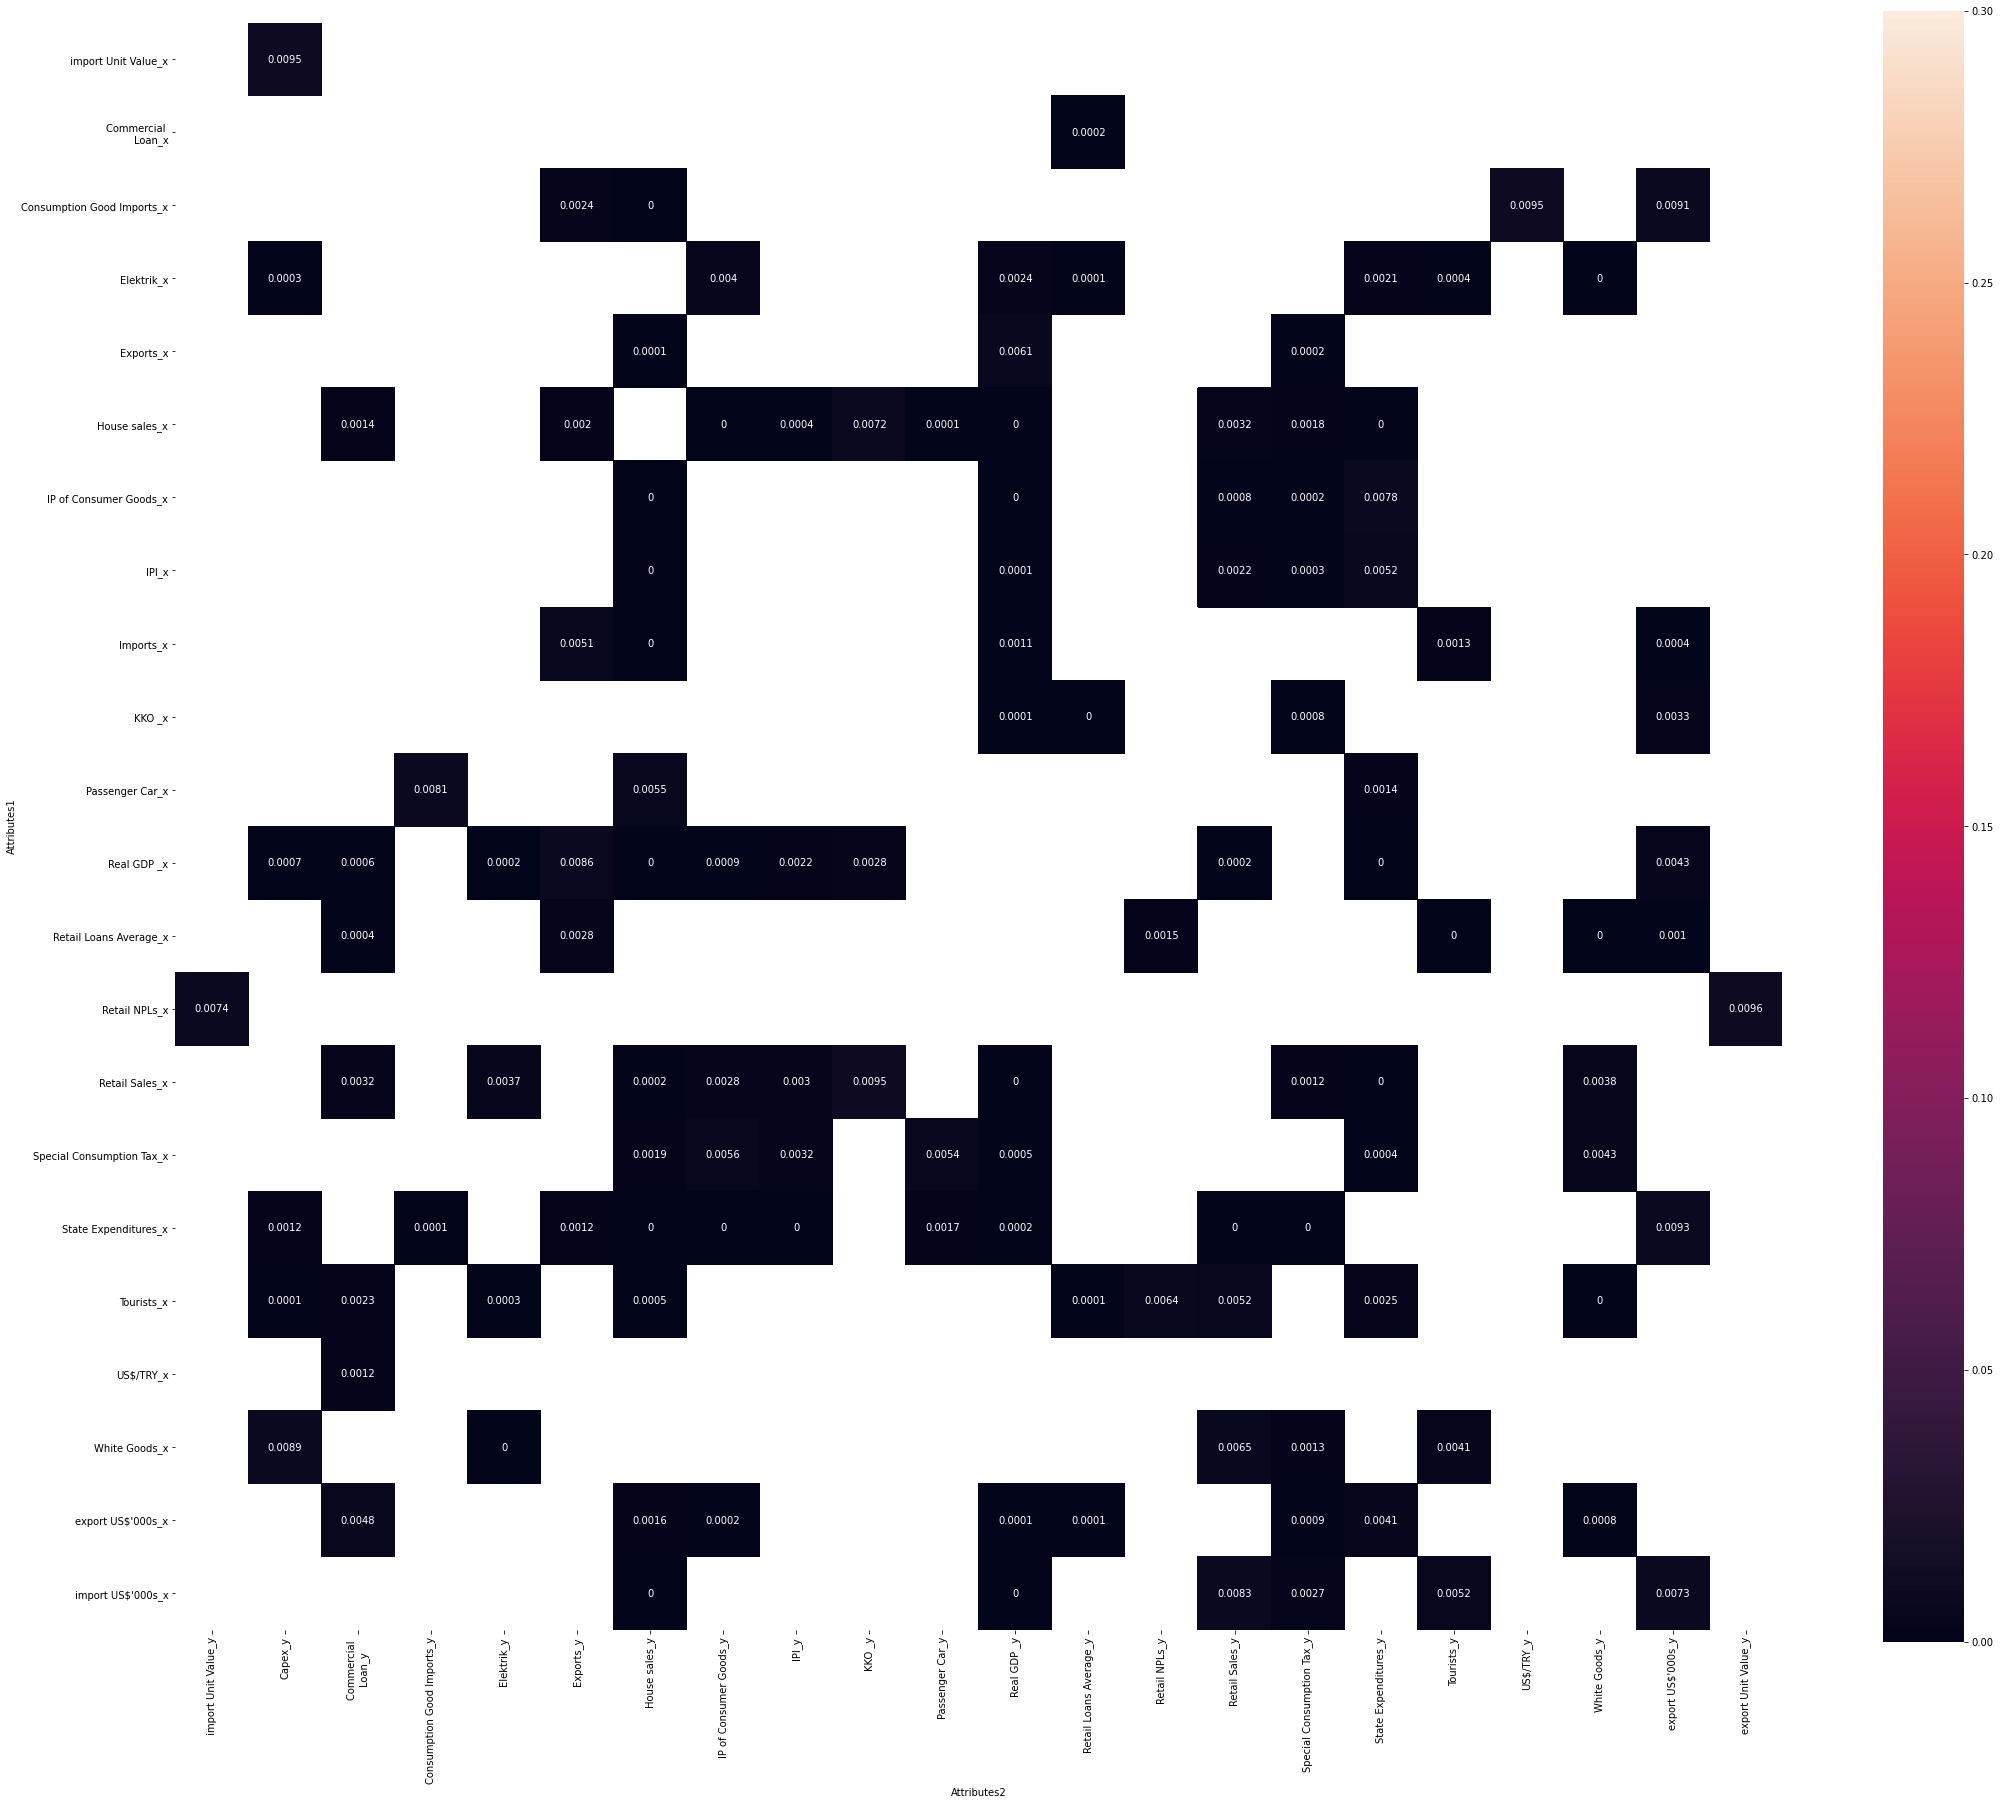

In [ ]:
f, ax = plt.subplots(figsize=(36, 30))
ax = sns.heatmap(table, vmax=.3, square=True,annot=True)

In [ ]:
o = o.iloc[:36, :36] 
cut_off = 0.01
high_corrs = o[o.abs() < cut_off][o.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()

In [ ]:
high_corrs

,level_0,level_1,0
0,Retail Sales_x,IP of Consumer Goods_y,0.0028
1,Retail Sales_x,Special Consumption Tax_y,0.0012
2,Retail Sales_x,State Expenditures_y,0.0000
3,Retail Sales_x,White Goods_y,0.0038
4,Retail Sales_x,House sales_y,0.0002
5,Retail Sales_x,IPI_y,0.0030
6,Retail Sales_x,Commercial \nLoan_y,0.0032
7,Retail Sales_x,KKO _y,0.0095
8,Retail Sales_x,Elektrik_y,0.0037
9,Retail Sales_x,Real GDP _y,0.0000


In [ ]:
o = o.iloc[:36, :36] 
cut_off = 0.01
high_corrs = o[o.abs() < cut_off][o.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = True).reset_index()

,index,Attributes1,Attributes2,Correlations
0,2,Retail Sales_x,State Expenditures_y,0.0000
1,33,State Expenditures_x,Consumption Good Imports_y,0.0001
2,4,Retail Sales_x,House sales_y,0.0002
3,51,Tourists_x,Elektrik_y,0.0003
4,17,Retail Loans Average_x,Commercial \nLoan_y,0.0004
5,31,Special Consumption Tax_x,Real GDP _y,0.0005
6,119,Real GDP _x,Commercial \nLoan_y,0.0006
7,118,Real GDP _x,Capex_y,0.0007
8,20,IP of Consumer Goods_x,Retail Sales_y,0.0008
9,91,export US$'000s_x,Special Consumption Tax_y,0.0009


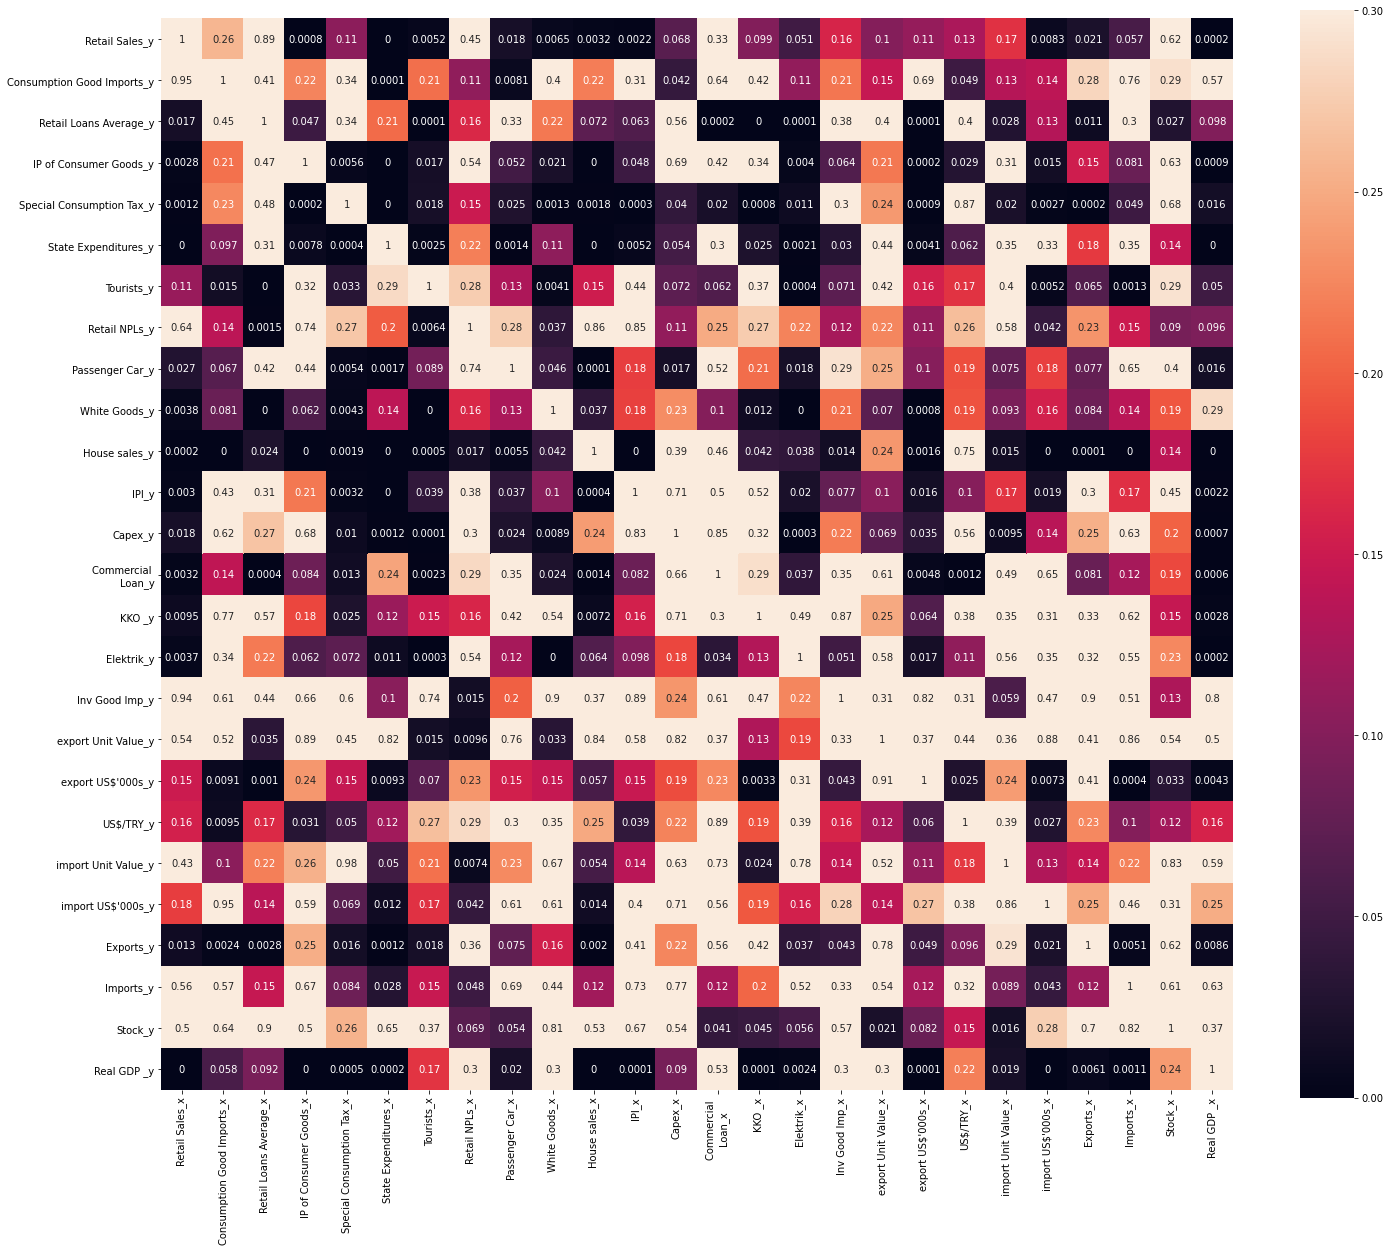

In [ ]:
f, ax = plt.subplots(figsize=(24, 20))
ax = sns.heatmap(o, vmax=.3, square=True,annot=True)

Result: If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

If two or more time-series are cointegrated, then there must be Granger causality between them - either one-way or in both directions. However, the converse is not true.

So, if your data are cointegrated but you don't find any evidence of causality, you have a conflict in your results. (This might occur if your sample size is too small to satisfy the asymptotics that the cointegration and causality tests rely on.) If you have cointegration and find one-way causality, everything is fine. (You may still be wrong about there being no causality in the other direction.) If your data are not cointegrated, then you have no cross-check on your causality results.



In [ ]:
https://rishi-a.github.io/2020/05/25/granger-causality.html